<a href="https://colab.research.google.com/github/Suyash-Codes-AI/DEEP-LEARNING/blob/main/ADMISSION_PREDICTION_USING_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mohansacharya_graduate_admissions_path = kagglehub.dataset_download('mohansacharya/graduate-admissions')

print('Data source import complete.')


Using Colab cache for faster access to the 'graduate-admissions' dataset.
Data source import complete.


In [6]:
from google.colab import files
uploaded = files.upload()


Saving Admission_Predict.csv to Admission_Predict (1).csv


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [8]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [9]:
df.shape

(500, 9)

In [10]:
df.shape

(500, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [15]:
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [16]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [17]:
X,y

(     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 0             1        337          118                  4  4.5   4.5  9.65   
 1             2        324          107                  4  4.0   4.5  8.87   
 2             3        316          104                  3  3.0   3.5  8.00   
 3             4        322          110                  3  3.5   2.5  8.67   
 4             5        314          103                  2  2.0   3.0  8.21   
 ..          ...        ...          ...                ...  ...   ...   ...   
 495         496        332          108                  5  4.5   4.0  9.02   
 496         497        337          117                  5  5.0   5.0  9.87   
 497         498        330          120                  5  4.5   5.0  9.56   
 498         499        312          103                  4  4.0   5.0  8.43   
 499         500        327          113                  4  4.5   4.5  9.04   
 
      Research  
 0           1  
 1  

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [19]:
B = X_train

In [20]:
B


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,239,310,104,3,2.0,3.5,8.37,0
438,439,318,110,1,2.5,3.5,8.54,1
475,476,300,101,3,3.5,2.5,7.88,0
58,59,300,99,1,3.0,2.0,6.80,1
380,381,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...,...
255,256,307,110,4,4.0,4.5,8.37,0
72,73,321,111,5,5.0,5.0,9.45,1
396,397,325,107,3,3.0,3.5,9.11,1
235,236,326,111,5,4.5,4.0,9.23,1


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled

array([[0.47695391, 0.4       , 0.42857143, ..., 0.57142857, 0.50320513,
        0.        ],
       [0.87775551, 0.56      , 0.64285714, ..., 0.57142857, 0.55769231,
        1.        ],
       [0.95190381, 0.2       , 0.32142857, ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.79358717, 0.7       , 0.53571429, ..., 0.57142857, 0.74038462,
        1.        ],
       [0.47094188, 0.72      , 0.67857143, ..., 0.71428571, 0.77884615,
        1.        ],
       [0.0741483 , 0.2       , 0.46428571, ..., 0.14285714, 0.32051282,
        0.        ]])

In [23]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [24]:
model = Sequential()
model.add(Dense(7,activation = 'relu',input_dim=7))
model.add(Dense(1,activation = 'linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [27]:
history = model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 7, but received input with shape (32, 8)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 8), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# check input shape of your data
print("X_train_scaled shape:", X_train_scaled.shape)

# build model with correct input shape
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # dynamic input shape
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # assuming binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)


X_train_scaled shape: (400, 8)
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.0000e+00 - loss: 0.6697 - val_accuracy: 0.0000e+00 - val_loss: 0.5956
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 0.6040 - val_accuracy: 0.0000e+00 - val_loss: 0.5529
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0000e+00 - loss: 0.5722 - val_accuracy: 0.0000e+00 - val_loss: 0.5432
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.5801 - val_accuracy: 0.0000e+00 - val_loss: 0.5401
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 0.5753 - val_accuracy: 0.0000e+00 - val_loss: 0.5387
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.5615 - val_accuracy: 0.0000e+00 - val_loss: 0.5380
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 0.5733 - val_accuracy: 0.0000e+00 - val_loss: 0.5359
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.

In [29]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8219522889492568

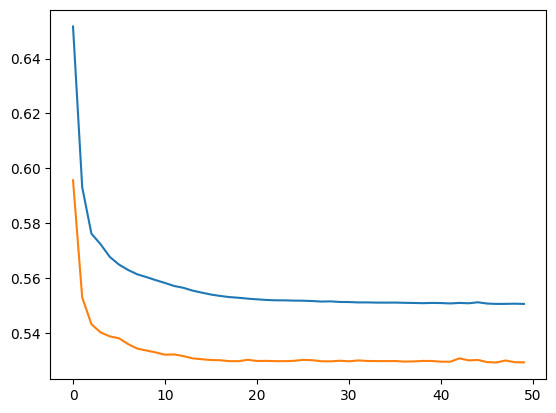

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])